In [13]:
import pandas as pd                 # Data tables
import os                           # Returns current directory, create files
import numpy as np                  # Arrays
import matplotlib.pyplot as plt	    # Graphs

from matplotlib import colormaps

from math import sqrt, atan, log, exp, sin, cos, tan

from scipy.integrate import odeint
from scipy.integrate import solve_ivp
from scipy.optimize import *

from Heat_loads_wall_DTE_230318 import *

pd.options.display.max_columns = 999

# DATA

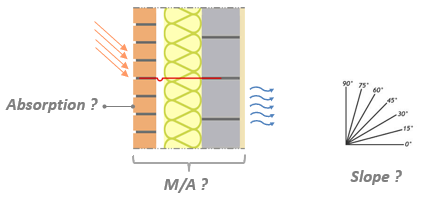

In [14]:
# Short wave absorption coefficient at the external wall surface, comprise between 0 and 1
absorption    = 0.6

# Specific mass per square meter of the wall area, in [kg/m2] 
M_A           = 310

# U value, in [W/m2K] 
U             = 0.22

# Azimuth of the wall, in deg  (South = 0, West = 90, North = 180, East = -90) 
azimuth_w_deg = 90

# Slope of the wall, comprised between -90 and 90, in deg
slope_w_deg   = 90

# Shaded wall: 1 = True, 0 = False
shading       = 0

In [15]:
# Month
month = 7

# Indoor temperature set point, in °C
t_in  = 26

# Imposed external temperatures  (max and variation) in °C (1: imposed values, 0: default values)
imposed_t_out = 0

# Daily max external temperature, in °C
t_out_max  = 32

# Daily variation of external temperature, in °C
DELTAt_out = 12 

In [16]:
dfl, dfp, dfc, dfptout, dfctout = CLF( absorption, M_A, U, azimuth_w_deg, slope_w_deg, shading, month, t_in, \
                                      imposed_t_out, t_out_max, DELTAt_out, method="LSODA")

# Default : method="LSODA"
# Other   :  method="Radau", method="RK45" 

### Air temperatures

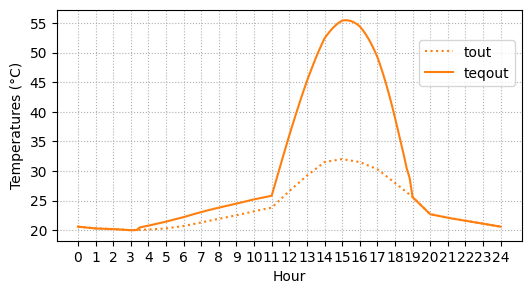

In [17]:
plt.figure(figsize = (6,3))
plt.xticks(np.arange(0, dfl['hour_per'].values[-1] + 1 , 1))
# plt.plot(dfl['hour_per'], dfl['T_0'], color= 'C0', label='tin' )
plt.plot(dfl['hour_per'], dfl['TOUT'], color= 'C1',linestyle='dotted', label='tout')
plt.plot(dfl['hour_per'], dfl['T_10'], color= 'C1',label='teqout')
plt.xlabel('Hour')
plt.ylabel('Temperatures (°C)')
plt.legend(bbox_to_anchor=(1, 0.9))
plt.grid(linestyle= 'dotted')

In [18]:
dfptout.T

hour_per,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24
TOUT,20.6,20.3,20.2,20.0,20.1,20.3,20.7,21.3,21.9,22.5,23.2,23.8,26.6,29.2,31.5,32.0,31.5,30.3,28.0,25.6,22.7,22.1,21.6,21.1,20.6


In [19]:
dfctout.T.to_clipboard(index=False)

### Temperature profiles

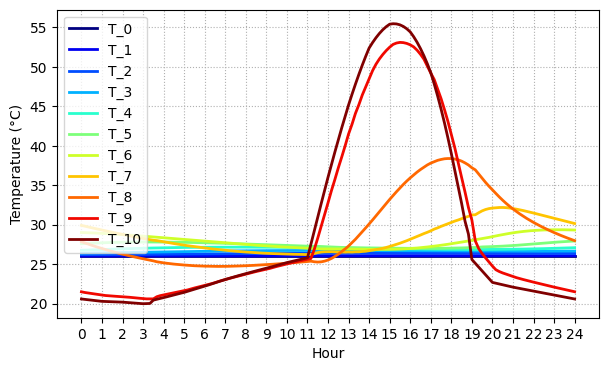

In [20]:
n_nodes = 9
cmap = colormaps['jet']
dfl[['hour_per']+['T_' + str(j) for j in range(n_nodes+2)]].plot(x ='hour_per',grid=True, figsize=(7,4), linewidth=2.0, xticks=np.arange(0, dfl['hour_per'].values[-1] + 1 , 1), cmap=cmap)
plt.xlabel('Hour')
plt.ylabel('Temperature (°C)')
plt.grid(linestyle= 'dotted');

### Equivalent temperature difference

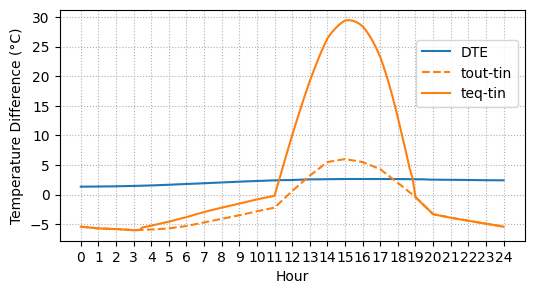

In [21]:
plt.figure(figsize = (6,3))
plt.xticks(np.arange(0, dfl['hour_per'].values[-1] + 1 , 1))
plt.plot(dfl['hour_per'], dfl['DTE'], color= 'C0', label='DTE' )
plt.plot(dfl['hour_per'], dfl['TOUT'] - t_in, color= 'C1', linestyle= 'dashed', label='tout-tin')
plt.plot(dfl['hour_per'], dfl['DTE_out'], color= 'C1', label='teq-tin' )
plt.xlabel('Hour')
plt.ylabel('Temperature Difference (°C)')
plt.legend(bbox_to_anchor=(1, 0.9))
plt.grid(linestyle= 'dotted')

In [22]:
dfp.T

hour_per,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24
DTE,1.34,1.37,1.41,1.47,1.55,1.66,1.79,1.92,2.06,2.19,2.31,2.41,2.48,2.57,2.61,2.64,2.65,2.64,2.63,2.6,2.53,2.52,2.47,2.43,2.42


In [23]:
dfc.T.to_clipboard(index=False)